<a href="https://colab.research.google.com/github/wajeehafarooqi/Deeplearning/blob/ANN/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#split dependent and independent variables iloc[all rows,column from index to end index]
X = df.iloc[:,3:13]
y = df.iloc[:,13]


In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

##Feature Engineering<br>

HOT ENCODING
using with get_dummies function of pandas and drop the first column . 

In [ ]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

##Concatenate these variable with dataframe . first we have to drop the variables in dataset which are hot encoding now.for that we can use drop function,

In [ ]:
X = X.drop(['Geography','Gender'],axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
X= pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


##TRAIN TEST SPLIT

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

What is feature scaling?
Feature scaling is a method used to normalize the range of independent
variables or features of data. In data processing, it is also known as 
data normalization and is generally performed during the data preprocessing
step.

**whenever there is a <u>DISTANCE BASE</u> & <u>GRADIENT DESCENT /optimizers</u>
 involve we need feature scaling**
for example 

*   ANN
*   knn
*   linear Regression
*   logistic regression
*   K-means
*   Random forest
*   XGboost

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
from tensorflow.keras.models import Sequential # forward, backpropagation
from tensorflow.keras.layers import Dense     # create neurons(i/p layer, hidden layers, output layer)
from tensorflow.keras.layers import ReLU      # create Activation Function 
from tensorflow.keras.layers import Dropout  # overfitting: when training data accu is high but test data accuracy is less,problem of overfitting occur, we use droput ---DEAD THE NEURON

In [ ]:
model = Sequential()

In [ ]:
#INput layer
model.add(Dense(units=11,activation='relu'))

In [ ]:
#first hidden layer
model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.2))

In [ ]:
#second hidden layer
model.add(Dense(units=6,activation='relu'))
model.add(Dropout(0.3))

In [ ]:
#output  layer
model.add(Dense(1,activation='sigmoid'))#binary classification  problem

In [ ]:
#train entire neural network
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#learning rate in adam by-default is 0.01
#import tensorflow
 #opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
import tensorflow as tf
early_stoppinng=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
model_history = model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100, callbacks=early_stoppinng)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5892 - accuracy: 0.7858 - val_loss: 0.5092 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5095 - accuracy: 0.7970 - val_loss: 0.4717 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4879 - accuracy: 0.7975 - val_loss: 0.4467 - val_accuracy: 0.7970
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4662 - accuracy: 0.8022 - val_loss: 0.4251 - val_accuracy: 0.8035
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4554 - accuracy: 0.8069 - val_loss: 0.4183 - val_accuracy: 0.8020
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4531 - accuracy: 0.8067 - val_loss: 0.4201 - val_accuracy: 0.7978
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4471 - accuracy: 0.8050 - val_loss: 0.4125 - val_accuracy: 0.8016

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

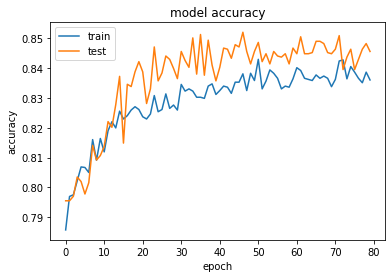

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

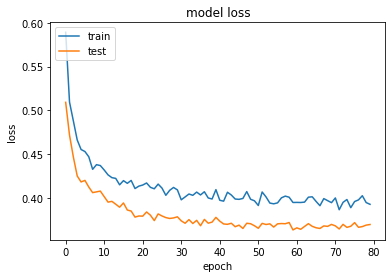

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#prediction

yhat = model.predict(X_test)
yhat = (yhat>=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_test,yhat)

array([[1574,   21],
       [ 268,  137]])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(yhat,y_test)
score

0.8555